In [9]:
from sklearn.cross_validation import KFold
from sklearn.svm import LinearSVC,SVC 
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,confusion_matrix
from scipy.cluster.vq import vq, kmeans, whiten
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
# from itertools import izip
# import zip
# from itertools import izip
try:
    from itertools import izip
except ImportError:
        izip = zip

In [10]:
def Run_Classifier(train_indices,test_indices, X, y,c):
    classifier=SVC(C=5, kernel='rbf', degree=3, decision_function_shape='ovr', random_state=None)
    #classifier=AdaBoostClassifier(base_estimator=SVC(C=1.0, kernel='linear', degree=3, decision_function_shape='ovr', random_state=None),
    # n_estimators=50, learning_rate=0.2, algorithm='SAMME', random_state=None)
    # classifier=RandomForestClassifier(n_estimators=60, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
    # 	max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1,
    # 	 random_state=None, verbose=0, warm_start=False, class_weight=None)
    # classifier=KNeighborsClassifier(n_neighbors=8, weights='distance', algorithm='auto', 
    # 	leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=1)
    # print("Training one vs rest classifier")

    X1 = X[train_indices]
    y1 = y[train_indices]
    randls = np.random.permutation(X1.shape[0])
    X_trnR = X1[randls,:]
    y_trnR = y1[randls]

    classifier.fit(X_trnR,y_trnR)
    y_test=y[test_indices]
    y_predicted=classifier.predict(X[test_indices])
    return y_test,y_predicted

In [11]:
if __name__ == '__main__':
    print ("Start loading...")
#     X_male_us = np.load(r"C:\Users\Dell\Documents\Project Files\X_male.dat")
#     print (X_male_us.shape)
    X_female_us = np.load(r"C:\Users\Dell\Documents\Project Files\X_female.dat")
#     print (X_male_us.shape)
#     y_male = np.load(r"C:\Users\Dell\Documents\Project Files\y_male.dat")
    y_female = np.load(r"C:\Users\Dell\Documents\Project Files\y_female.dat")

    scaler_m = StandardScaler(copy=True, with_mean=True, with_std=True)
#     X_male = scaler_m.fit_transform(X_male_us)
    scaler_f = StandardScaler(copy=True, with_mean=True, with_std=True)
    X_female = scaler_f.fit_transform(X_female_us)
    print ("Done.")

Start loading...
(1200, 273)
(1200, 273)
Done.


In [12]:
    efficiency_male=efficiency_female=0
    # total=0
    kf=KFold(len(y_male),n_folds=15)
    # cval=[0.01,0.1,0.4,0.8,1,2,5]
    # gammaval= [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]
    # acc_list_m=[]
    # acc_list_f=[]
    list_test_male=[]
    list_test_female=[]
    list_pred_male=[]
    list_pred_female=[]
    # for c in gammaval:
    total=0
#     y_test_male=[]
#     y_pred_male=[]
    y_test_female=[]
    y_pred_female=[]
    
    # accuracy_male=[]
#     recall_male=[0,0,0,0,0,0,0,0]
#     precision_male=[0,0,0,0,0,0,0,0]
#     f1_male=[0,0,0,0,0,0,0,0]
#     accuracy_female=[]
    recall_female=[0,0,0,0,0,0,0,0]
    precision_female=[0,0,0,0,0,0,0,0]
    f1_female=[0,0,0,0,0,0,0,0]	
    accuracy_male_avg=0
#     recall_male_avg=0
#     precision_male_avg=0
    accuracy_female_avg=0
    recall_female_avg=0
    precision_female_avg=0	
#     f1_male_avg=0
    f1_female_avg=0
    label_list=['anger','disgust','fear','happy','neutral','sadness','sarcastic','surprise']
    for train_inds,test_inds in kf:
#       y_test_male,y_pred_male=Run_Classifier(train_inds, test_inds, X_male, y_male, 0)
        y_test_female,y_pred_female=Run_Classifier(train_inds, test_inds, X_female, y_female, 0)
#       accuracy_male_avg+=(accuracy_score(y_test_male,y_pred_male)*100.0)
        accuracy_female_avg+=(accuracy_score(y_test_female,y_pred_female)*100.0)
#       recall_male_avg+=(recall_score(y_test_male,y_pred_male,average='macro')*100.0)
        recall_female_avg+=(recall_score(y_test_female,y_pred_female,average='macro')*100.0)
#       precision_male_avg+=(precision_score(y_test_male,y_pred_male,average='macro')*100.0)
        precision_female_avg+=(precision_score(y_test_female,y_pred_female,average='macro')*100.0)
#       f1_male_avg+=(f1_score(y_test_male,y_pred_male,average='macro')*100.0)
        f1_female_avg+=(f1_score(y_test_female,y_pred_female,average='macro')*100.0)
        temp=recall_score(y_test_male,y_pred_male,average=None)
        # print temp
        temp2=[sum(x) for x in izip(recall_male,temp)]
#       recall_male=temp2[:]
#       temp=precision_score(y_test_male,y_pred_male,average=None)
#       temp2=[sum(x) for x in izip(precision_male,temp)]
#       precision_male=temp2[:]
#       temp=f1_score(y_test_male,y_pred_male,average=None)
#       temp2=[sum(x) for x in izip(f1_male,temp)]
#       f1_male=temp2[:]
        temp=recall_score(y_test_female,y_pred_female,average=None)
        temp2=[sum(x) for x in izip(recall_female,temp)]
        recall_female=temp2[:]
        temp=precision_score(y_test_female,y_pred_female,average=None)
        temp2=[sum(x) for x in izip(precision_female,temp)]
        precision_female=temp2[:]
        temp=f1_score(y_test_female,y_pred_female,average=None)
        temp2=[sum(x) for x in izip(f1_female,temp)]
        f1_female=temp2[:]
#         list_test_male.extend(y_test_male)
#         list_pred_male.extend(y_pred_male)
        list_test_female.extend(y_test_female)
        list_pred_female.extend(y_pred_female)
        total+=1

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Male
Accuracy avg : 12.5
Recall avg : 12.5
Precision avg : 1.5625
F1 avg : 2.77777777778
Female
Accuracy avg : 12.5
Recall avg : 12.5
Precision avg : 1.5625
F1 avg : 2.77777777778
['anger', 'disgust', 'fear', 'happy', 'neutral', 'sadness', 'sarcastic', 'surprise']
Normalized male confusion matrix
[[  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]]
Normalized female confusion matrix
[[  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]]
for male
	recall	precision	f1
anger	0.00	0.00	0.00
disgust	0.00	0.00	0.00
fear	0.00	0.00	0.00
happy	0.00	

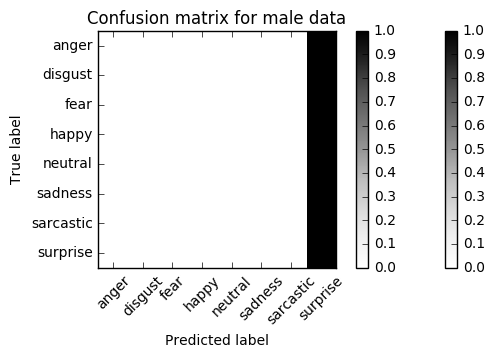

In [13]:
#     print("Male")
#     print("Accuracy avg : "+str((accuracy_male_avg/total)))
#     print("Recall avg : "+str((recall_male_avg/total)))
#     print("Precision avg : "+str((precision_male_avg/total)))
#     print("F1 avg : "+str((f1_male_avg/total)))
    print("Female")
    print("Accuracy avg : "+str((accuracy_female_avg/total)))
    print("Recall avg : "+str((recall_female_avg/total)))
    print("Precision avg : "+str((precision_female_avg/total)))
    print("F1 avg : "+str((f1_female_avg/total)))
#     recall_male[:]=[x/total for x in recall_male]
#     precision_male[:]=[x/total for x in precision_male]
#     f1_male[:]=[x/total for x in f1_male]
    recall_female[:]=[x/total for x in recall_female]
    precision_female[:]=[x/total for x in precision_female]
    f1_female[:]=[x/total for x in f1_female]
#     cm_male=confusion_matrix(list_test_male,list_pred_male)
    cm_female=confusion_matrix(list_test_female,list_pred_female)
#     cm_norm_male = cm_male.astype('float') / cm_male.sum(axis=1)[:, np.newaxis]
    cm_norm_female = cm_female.astype('float') / cm_female.sum(axis=1)[:, np.newaxis]
    print (label_list)
#     print('Normalized male confusion matrix')
#     print(cm_male)
#     print('Normalized female confusion matrix')
    print(cm_female)
#     print("for male")
#     print ("\trecall\tprecision\tf1")
#     for x in label_list:
#         print(x+"\t%.2f"%recall_male[label_list.index(x)]+"\t%.2f"%precision_male[label_list.index(x)]+"\t%.2f"%f1_male[label_list.index(x)])
    print("for female")	
    for x in label_list:
        print(x+"\t%.2f"%recall_female[label_list.index(x)]+"\t%.2f"%precision_female[label_list.index(x)]+"\t%.2f"%f1_female[label_list.index(x)])
    plt.figure(1)
#     plt.imshow(cm_norm_male, interpolation='nearest', cmap=plt.cm.Greys)
    plt.title("Confusion matrix for male data")
    plt.colorbar()
    tick_marks = np.arange(len(label_list))
    plt.xticks(tick_marks, label_list, rotation=45)
    plt.yticks(tick_marks, label_list)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#   plt.savefig("./figures/confusion_matrix_male.png", bbox_inches='tight')
    plt.show()

In [14]:
#     print("Male")
#     print("Accuracy avg : "+str((accuracy_male_avg/total)))
#     print("Recall avg : "+str((recall_male_avg/total)))
#     print("Precision avg : "+str((precision_male_avg/total)))
#     print("F1 avg : "+str((f1_male_avg/total)))
    print("Female")
    print("Accuracy avg : "+str((accuracy_female_avg/total)))
    print("Recall avg : "+str((recall_female_avg/total)))
    print("Precision avg : "+str((precision_female_avg/total)))
    print("F1 avg : "+str((f1_female_avg/total)))
#     recall_male[:]=[x/total for x in recall_male]
#     precision_male[:]=[x/total for x in precision_male]
#     f1_male[:]=[x/total for x in f1_male]
    recall_female[:]=[x/total for x in recall_female]
    precision_female[:]=[x/total for x in precision_female]
    f1_female[:]=[x/total for x in f1_female]
#     cm_male=confusion_matrix(list_test_male,list_pred_male)
    cm_female=confusion_matrix(list_test_female,list_pred_female)
#     cm_norm_male = cm_male.astype('float') / cm_male.sum(axis=1)[:, np.newaxis]
    cm_norm_female = cm_female.astype('float') / cm_female.sum(axis=1)[:, np.newaxis]
    print (label_list)
#     print('Normalized male confusion matrix')
#     print(cm_male)
    print('Normalized female confusion matrix')
    print(cm_female)
#     print("for male")
#     print ("\trecall\tprecision\tf1")
#     for x in label_list:
#         print(x+"\t%.2f"%recall_male[label_list.index(x)]+"\t%.2f"%precision_male[label_list.index(x)]+"\t%.2f"%f1_male[label_list.index(x)])
    print("for female")	
    for x in label_list:
        print(x+"\t%.2f"%recall_female[label_list.index(x)]+"\t%.2f"%precision_female[label_list.index(x)]+"\t%.2f"%f1_female[label_list.index(x)])
#     plt.figure(1)
#     plt.imshow(cm_norm_male, interpolation='nearest', cmap=plt.cm.Greys)
#     plt.title("Confusion matrix for male data")
#     plt.colorbar()
#     tick_marks = np.arange(len(label_list))
#     plt.xticks(tick_marks, label_list, rotation=45)
#     plt.yticks(tick_marks, label_list)
#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.savefig("./figures/confusion_matrix_male.png", bbox_inches='tight')
#     plt.show()

    plt.figure(2)
    plt.imshow(cm_norm_female, interpolation='nearest', cmap=plt.cm.Greys)
    plt.title("Confusion matrix for female data")
    plt.colorbar()
    tick_marks = np.arange(len(label_list))
    plt.xticks(tick_marks, label_list, rotation=45)
    plt.yticks(tick_marks, label_list)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#   plt.savefig("./figures/confusion_matrix_female.png", bbox_inches='tight')
    plt.show()

Male
Accuracy avg : 12.5
Recall avg : 12.5
Precision avg : 1.5625
F1 avg : 2.77777777778
Female
Accuracy avg : 12.5
Recall avg : 12.5
Precision avg : 1.5625
F1 avg : 2.77777777778
['anger', 'disgust', 'fear', 'happy', 'neutral', 'sadness', 'sarcastic', 'surprise']
Normalized male confusion matrix
[[  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]]
Normalized female confusion matrix
[[  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0 150]]
for male
	recall	precision	f1
anger	0.00	0.00	0.00
disgust	0.00	0.00	0.00
fear	0.00	0.00	0.00
happy	0.00	

FileNotFoundError: [Errno 2] No such file or directory: './figures/confusion_matrix_male.png'